# Skin Detection System V1 Using Mobile Net V3

Start Date - 10 March 2025.
End Date - 13 March 2025.

Proposed architectures resulted in overfitting.

Initial test for using this dataset from Kaggle by Ismail Hossain : https://www.kaggle.com/datasets/ismailpromus/skin-diseases-image-dataset/data


In [ ]:
# !pip install torch; torchvision; kagglehub

# import kagglehub

# path = kagglehub.dataset_download("ismailpromus/skin-diseases-image-dataset")

# print("Path to dataset files:", path)

In [13]:
# import os
# import shutil
# import random

# # Paths
# root_dir = "./Data/Hamm1000/IMG_CLASSES"  # Change this to your actual dataset path
# output_dir = "./Data/Hamm1000/TRAIN_TEST"
# train_dir = os.path.join(output_dir, "train")
# test_dir = os.path.join(output_dir, "test")

# # Create TRAIN_TEST directories
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Loop through each disease folder
# for category in os.listdir(root_dir):
#     category_path = os.path.join(root_dir, category)
    
#     if os.path.isdir(category_path):
#         images = os.listdir(category_path)
#         random.shuffle(images)  # Shuffle for randomness
        
#         # Split 80-20
#         split_idx = int(0.8 * len(images))
#         train_images = images[:split_idx]
#         test_images = images[split_idx:]

#         # Create category folders in train and test
#         train_category_path = os.path.join(train_dir, category)
#         test_category_path = os.path.join(test_dir, category)
#         os.makedirs(train_category_path, exist_ok=True)
#         os.makedirs(test_category_path, exist_ok=True)

#         # Copy images
#         for img in train_images:
#             shutil.copy(os.path.join(category_path, img), os.path.join(train_category_path, img))
        
#         for img in test_images:
#             shutil.copy(os.path.join(category_path, img), os.path.join(test_category_path, img))

# print("Dataset split completed.")


## Initial Data Loading


In [14]:
import torch
import torchvision
from torchvision import transforms
from pathlib import Path
from torch import nn

device = "cpu"

if torch.cuda.is_available():
    device = "cuda"
elif torch.xpu.is_available():
    device = "xpu"
else: device = "cpu"
device

'cpu'

In [1]:
path = "./Data/SkinDiseaseImageDataSet/"

In [1]:
data = Path(path)
image_path = data/"TINY" # Took small amounts of images for 2 diseases : Atopic DermaTitis | Eczema | Fungal Infections


train_dir = image_path/"train"
test_dir = image_path/"test"

NameError: name 'Path' is not defined

## Converting to Datasets & DataLoaders


In [45]:
train_transform = transforms.Compose([
    transforms.Resize(size=(200, 200)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
])
test_transfrom = transforms.Compose([
    transforms.Resize(size=(200, 200)),
    transforms.ToTensor(),
])

In [46]:
train_dataset = torchvision.datasets.ImageFolder(train_dir,
                                                 transform=train_transform,
                                                 target_transform=None)

test_dataset = torchvision.datasets.ImageFolder(test_dir,
                                                 transform=test_transfrom,
                                                 target_transform=None)

img, label = train_dataset[1][0], train_dataset[1][1]

img.shape

torch.Size([3, 200, 200])

In [47]:
len(train_dataset)

465

In [48]:
class_names = train_dataset.classes
len(class_names)

3

Text(0.5, 1.0, 'Atopic Dermatitis')

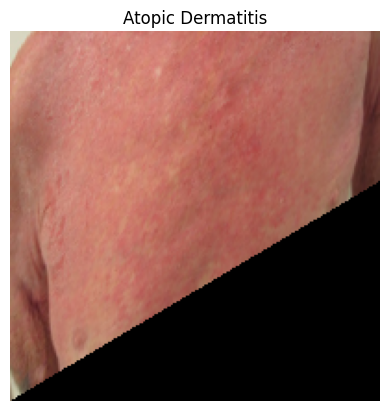

In [49]:
import matplotlib.pyplot as plt

plt.imshow(img.permute(1,2,0))
plt.axis(False)
plt.title(class_names[label])

In [50]:
import os
os.cpu_count()

8

In [51]:
from torch.utils.data import DataLoader

BATCH_SIZE = 50

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=8)

test_dataloader = DataLoader(dataset=test_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=8)

len(train_dataloader), len(test_dataloader)

(10, 2)

## Model


In [52]:
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

# Initialize model
model_0 = mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT).to(device)

model_0.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=False),
    nn.Linear(in_features=1280, out_features=1000),
    nn.Linear(in_features=1000, out_features=len(class_names))
)

model_0

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [53]:
# lstm = nn.Sequential(
#     nn.LSTM(input_size=1000, hidden_size=1024),
#     nn.Linear(1024, len(class_names))
# )

In [54]:
img.shape

torch.Size([3, 200, 200])

In [55]:
model_0(img.unsqueeze(dim=0)).shape

torch.Size([1, 3])

In [56]:
len(class_names)

3

## Functionalizing Training and Testing Functions


In [57]:
from tqdm.auto import tqdm

def train_step(model: nn.Module,
               dataloader,
               loss_fn,
               optimizer,
               acc_fn,
               device):

    """
    Function to train our model with clearly set hyperparameters
    """

    train_acc, train_loss = 0,0

    for batch, (X,y) in enumerate(dataloader):
        model.train()
        X, y = X.to(device), y.to(device)
        logits = model(X)

        y=y.to(torch.int64)

        loss = loss_fn(logits, y)
        acc = acc_fn(preds=logits.argmax(dim=1), target=y)

        train_loss += loss.item()
        train_acc += acc

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 1 == 0:
            print(f"Went through {batch} batches")
            print(f"|| Train_Accuracy: {acc:.3f} & Train_Loss: {loss:.3f} ||")

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    print(f"|| Train_Accuracy: {train_acc:.3f} & Train_Loss: {train_loss:.3f} ||")
    print("Training for current epoch completed successfully.")
    return train_acc, train_loss

def test_step(model: nn.Module,
             dataloader,
             loss_fn,
             acc_fn,
             device):
    
    """
    Function to test our model with clearly set hyperparameters
    """

    test_acc, test_loss = 0,0

    for batch, (X,y) in enumerate(dataloader):
        model.eval()
        X, y = X.to(device), y.to(device)
        with torch.inference_mode():
            logits = model(X)

            y=y.to(torch.int64)

            loss = loss_fn(logits, y)
            acc = acc_fn(preds=logits.argmax(dim=1), target=y)

            test_loss += loss.item()
            test_acc += acc

            if batch % 1 == 0:
                print(f"Went through {batch} batches")
                print(f"|| Train_Accuracy: {acc:.3f} & Train_Loss: {loss:.3f} ||")

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"|| Test_Accuracy: {test_acc:.3f} & Test_Loss: {test_loss:.3f} ||")
    print("Testing for current epoch completed successfully.")
    return test_acc, test_loss

def train(model: nn.Module,
        train_dataloader,
        test_dataloader,
        loss_fn,
        optimizer,
        acc_fn,
        device,
        epochs: int):
    """
    Function to train the model for a specified number of epochs
    """

    results = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    EPOCHS = epochs

    for epoch in tqdm(range(EPOCHS)):
        print(f"\n\nStarting Epoch: {epoch}-----------------------------")
        train_acc, train_loss = train_step(model, train_dataloader, loss_fn, optimizer, acc_fn, device)
        test_acc, test_loss = test_step(model, test_dataloader, loss_fn, acc_fn, device)
        print(f"\nEnding Epoch: {epoch}-----------------------------")
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    return results

In [60]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                            lr=0.001,
                            weight_decay=0.0001)
def acc_fn(target, preds):
  """
  Calculates Accuracy.

  Args:
    target: The real data
    preds: Processed logits from the model
  """
  correct = torch.eq(target, preds).sum().item()
  acc = (correct/len(preds)) * 100
  return acc

In [61]:
from timeit import default_timer as timer

start = timer()

EPOCHS = 11

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        acc_fn=acc_fn,
                        device=device,
                        epochs=EPOCHS)

end = timer()

print(f"Training Time: {end-start:.2f} seconds for {EPOCHS} epochs on {device}.")

  0%|          | 0/11 [00:00<?, ?it/s]



Starting Epoch: 0-----------------------------
Went through 0 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.174 ||
Went through 1 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.248 ||
Went through 2 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.261 ||
Went through 3 batches
|| Train_Accuracy: 76.000 & Train_Loss: 0.388 ||
Went through 4 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.422 ||
Went through 5 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.267 ||
Went through 6 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.234 ||
Went through 7 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.378 ||
Went through 8 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.324 ||
Went through 9 batches
|| Train_Accuracy: 86.667 & Train_Loss: 0.363 ||
|| Train_Accuracy: 88.667 & Train_Loss: 0.306 ||
Training for current epoch completed successfully.
Went through 0 batches
|| Train_Accuracy: 14.000 & Train_Loss: 8.835 ||
Went through 1 batches
|| Train_Accuracy: 69.388 & Train_Lo

  9%|▉         | 1/11 [01:01<10:11, 61.17s/it]

|| Test_Accuracy: 41.694 & Test_Loss: 5.598 ||
Testing for current epoch completed successfully.

Ending Epoch: 0-----------------------------


Starting Epoch: 1-----------------------------
Went through 0 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.233 ||
Went through 1 batches
|| Train_Accuracy: 86.000 & Train_Loss: 0.432 ||
Went through 2 batches
|| Train_Accuracy: 86.000 & Train_Loss: 0.336 ||
Went through 3 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.208 ||
Went through 4 batches
|| Train_Accuracy: 82.000 & Train_Loss: 0.356 ||
Went through 5 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.300 ||
Went through 6 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.211 ||
Went through 7 batches
|| Train_Accuracy: 80.000 & Train_Loss: 0.719 ||
Went through 8 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.221 ||
Went through 9 batches
|| Train_Accuracy: 86.667 & Train_Loss: 0.229 ||
|| Train_Accuracy: 87.667 & Train_Loss: 0.325 ||
Training for current epoch completed su

 18%|█▊        | 2/11 [02:02<09:09, 61.07s/it]

|| Test_Accuracy: 27.347 & Test_Loss: 3.434 ||
Testing for current epoch completed successfully.

Ending Epoch: 1-----------------------------


Starting Epoch: 2-----------------------------
Went through 0 batches
|| Train_Accuracy: 96.000 & Train_Loss: 0.141 ||
Went through 1 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.216 ||
Went through 2 batches
|| Train_Accuracy: 98.000 & Train_Loss: 0.090 ||
Went through 3 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.255 ||
Went through 4 batches
|| Train_Accuracy: 86.000 & Train_Loss: 0.219 ||
Went through 5 batches
|| Train_Accuracy: 84.000 & Train_Loss: 0.450 ||
Went through 6 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.168 ||
Went through 7 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.261 ||
Went through 8 batches
|| Train_Accuracy: 98.000 & Train_Loss: 0.141 ||
Went through 9 batches
|| Train_Accuracy: 86.667 & Train_Loss: 0.171 ||
|| Train_Accuracy: 91.067 & Train_Loss: 0.211 ||
Training for current epoch completed su

 27%|██▋       | 3/11 [03:02<08:04, 60.54s/it]

|| Test_Accuracy: 34.612 & Test_Loss: 4.815 ||
Testing for current epoch completed successfully.

Ending Epoch: 2-----------------------------


Starting Epoch: 3-----------------------------
Went through 0 batches
|| Train_Accuracy: 98.000 & Train_Loss: 0.089 ||
Went through 1 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.316 ||
Went through 2 batches
|| Train_Accuracy: 98.000 & Train_Loss: 0.119 ||
Went through 3 batches
|| Train_Accuracy: 100.000 & Train_Loss: 0.101 ||
Went through 4 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.146 ||
Went through 5 batches
|| Train_Accuracy: 96.000 & Train_Loss: 0.110 ||
Went through 6 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.289 ||
Went through 7 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.273 ||
Went through 8 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.166 ||
Went through 9 batches
|| Train_Accuracy: 93.333 & Train_Loss: 0.143 ||
|| Train_Accuracy: 93.733 & Train_Loss: 0.175 ||
Training for current epoch completed s

 36%|███▋      | 4/11 [04:02<07:04, 60.66s/it]

|| Test_Accuracy: 39.714 & Test_Loss: 6.608 ||
Testing for current epoch completed successfully.

Ending Epoch: 3-----------------------------


Starting Epoch: 4-----------------------------
Went through 0 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.217 ||
Went through 1 batches
|| Train_Accuracy: 96.000 & Train_Loss: 0.187 ||
Went through 2 batches
|| Train_Accuracy: 98.000 & Train_Loss: 0.065 ||
Went through 3 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.214 ||
Went through 4 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.220 ||
Went through 5 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.154 ||
Went through 6 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.488 ||
Went through 7 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.286 ||
Went through 8 batches
|| Train_Accuracy: 98.000 & Train_Loss: 0.093 ||
Went through 9 batches
|| Train_Accuracy: 93.333 & Train_Loss: 0.237 ||
|| Train_Accuracy: 92.533 & Train_Loss: 0.216 ||
Training for current epoch completed su

 45%|████▌     | 5/11 [05:02<06:02, 60.39s/it]

|| Test_Accuracy: 37.633 & Test_Loss: 10.416 ||
Testing for current epoch completed successfully.

Ending Epoch: 4-----------------------------


Starting Epoch: 5-----------------------------
Went through 0 batches
|| Train_Accuracy: 96.000 & Train_Loss: 0.160 ||
Went through 1 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.423 ||
Went through 2 batches
|| Train_Accuracy: 98.000 & Train_Loss: 0.062 ||
Went through 3 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.258 ||
Went through 4 batches
|| Train_Accuracy: 80.000 & Train_Loss: 0.451 ||
Went through 5 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.423 ||
Went through 6 batches
|| Train_Accuracy: 96.000 & Train_Loss: 0.273 ||
Went through 7 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.233 ||
Went through 8 batches
|| Train_Accuracy: 96.000 & Train_Loss: 0.109 ||
Went through 9 batches
|| Train_Accuracy: 80.000 & Train_Loss: 0.361 ||
|| Train_Accuracy: 91.000 & Train_Loss: 0.275 ||
Training for current epoch completed s

 55%|█████▍    | 6/11 [06:03<05:03, 60.65s/it]

|| Test_Accuracy: 35.531 & Test_Loss: 3.578 ||
Testing for current epoch completed successfully.

Ending Epoch: 5-----------------------------


Starting Epoch: 6-----------------------------
Went through 0 batches
|| Train_Accuracy: 96.000 & Train_Loss: 0.138 ||
Went through 1 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.225 ||
Went through 2 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.283 ||
Went through 3 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.247 ||
Went through 4 batches
|| Train_Accuracy: 84.000 & Train_Loss: 0.434 ||
Went through 5 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.315 ||
Went through 6 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.215 ||
Went through 7 batches
|| Train_Accuracy: 86.000 & Train_Loss: 0.373 ||
Went through 8 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.160 ||
Went through 9 batches
|| Train_Accuracy: 93.333 & Train_Loss: 0.120 ||
|| Train_Accuracy: 91.133 & Train_Loss: 0.251 ||
Training for current epoch completed su

 64%|██████▎   | 7/11 [07:04<04:01, 60.44s/it]

|| Test_Accuracy: 37.592 & Test_Loss: 3.371 ||
Testing for current epoch completed successfully.

Ending Epoch: 6-----------------------------


Starting Epoch: 7-----------------------------
Went through 0 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.314 ||
Went through 1 batches
|| Train_Accuracy: 86.000 & Train_Loss: 0.265 ||
Went through 2 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.180 ||
Went through 3 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.239 ||
Went through 4 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.217 ||
Went through 5 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.365 ||
Went through 6 batches
|| Train_Accuracy: 86.000 & Train_Loss: 0.244 ||
Went through 7 batches
|| Train_Accuracy: 98.000 & Train_Loss: 0.086 ||
Went through 8 batches
|| Train_Accuracy: 84.000 & Train_Loss: 0.423 ||
Went through 9 batches
|| Train_Accuracy: 86.667 & Train_Loss: 0.316 ||
|| Train_Accuracy: 89.267 & Train_Loss: 0.265 ||
Training for current epoch completed su

 73%|███████▎  | 8/11 [08:03<03:00, 60.29s/it]

|| Test_Accuracy: 33.633 & Test_Loss: 4.406 ||
Testing for current epoch completed successfully.

Ending Epoch: 7-----------------------------


Starting Epoch: 8-----------------------------
Went through 0 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.166 ||
Went through 1 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.130 ||
Went through 2 batches
|| Train_Accuracy: 96.000 & Train_Loss: 0.111 ||
Went through 3 batches
|| Train_Accuracy: 98.000 & Train_Loss: 0.202 ||
Went through 4 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.242 ||
Went through 5 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.382 ||
Went through 6 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.267 ||
Went through 7 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.144 ||
Went through 8 batches
|| Train_Accuracy: 86.000 & Train_Loss: 0.326 ||
Went through 9 batches
|| Train_Accuracy: 86.667 & Train_Loss: 0.321 ||
|| Train_Accuracy: 91.467 & Train_Loss: 0.229 ||
Training for current epoch completed su

 82%|████████▏ | 9/11 [09:03<02:00, 60.20s/it]

|| Test_Accuracy: 34.571 & Test_Loss: 4.311 ||
Testing for current epoch completed successfully.

Ending Epoch: 8-----------------------------


Starting Epoch: 9-----------------------------
Went through 0 batches
|| Train_Accuracy: 98.000 & Train_Loss: 0.072 ||
Went through 1 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.114 ||
Went through 2 batches
|| Train_Accuracy: 86.000 & Train_Loss: 0.258 ||
Went through 3 batches
|| Train_Accuracy: 94.000 & Train_Loss: 0.204 ||
Went through 4 batches
|| Train_Accuracy: 88.000 & Train_Loss: 0.610 ||
Went through 5 batches
|| Train_Accuracy: 96.000 & Train_Loss: 0.314 ||
Went through 6 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.240 ||
Went through 7 batches
|| Train_Accuracy: 86.000 & Train_Loss: 0.246 ||
Went through 8 batches
|| Train_Accuracy: 98.000 & Train_Loss: 0.114 ||
Went through 9 batches
|| Train_Accuracy: 86.667 & Train_Loss: 0.322 ||
|| Train_Accuracy: 91.667 & Train_Loss: 0.249 ||
Training for current epoch completed su

 91%|█████████ | 10/11 [10:04<01:00, 60.29s/it]

|| Test_Accuracy: 39.531 & Test_Loss: 4.435 ||
Testing for current epoch completed successfully.

Ending Epoch: 9-----------------------------


Starting Epoch: 10-----------------------------
Went through 0 batches
|| Train_Accuracy: 96.000 & Train_Loss: 0.131 ||
Went through 1 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.155 ||
Went through 2 batches
|| Train_Accuracy: 96.000 & Train_Loss: 0.115 ||
Went through 3 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.182 ||
Went through 4 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.260 ||
Went through 5 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.166 ||
Went through 6 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.217 ||
Went through 7 batches
|| Train_Accuracy: 92.000 & Train_Loss: 0.226 ||
Went through 8 batches
|| Train_Accuracy: 90.000 & Train_Loss: 0.240 ||
Went through 9 batches
|| Train_Accuracy: 86.667 & Train_Loss: 0.293 ||
|| Train_Accuracy: 91.867 & Train_Loss: 0.198 ||
Training for current epoch completed s

100%|██████████| 11/11 [11:05<00:00, 60.47s/it]

|| Test_Accuracy: 40.694 & Test_Loss: 4.544 ||
Testing for current epoch completed successfully.

Ending Epoch: 10-----------------------------
Training Time: 665.17 seconds for 11 epochs on cpu.


In [62]:
model_0_results

{'train_loss': [0.3060379594564438,
  0.32457515001297,
  0.21128654330968857,
  0.17514499500393868,
  0.21613817885518075,
  0.2752907365560532,
  0.25105991512537,
  0.2647297605872154,
  0.22917826026678084,
  0.24941512271761895,
  0.19847001060843467],
 'train_acc': [88.66666666666666,
  87.66666666666666,
  91.06666666666666,
  93.73333333333333,
  92.53333333333333,
  91.0,
  91.13333333333334,
  89.26666666666667,
  91.46666666666667,
  91.66666666666666,
  91.86666666666666],
 'test_loss': [5.598024010658264,
  3.4339059591293335,
  4.815387964248657,
  6.60822057723999,
  10.416008234024048,
  3.578200936317444,
  3.371248245239258,
  4.406261742115021,
  4.310866117477417,
  4.434961438179016,
  4.543768048286438],
 'test_acc': [41.69387755102041,
  27.346938775510203,
  34.61224489795919,
  39.714285714285715,
  37.63265306122449,
  35.53061224489796,
  37.59183673469388,
  33.63265306122449,
  34.57142857142857,
  39.53061224489796,
  40.69387755102041]}

In [63]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

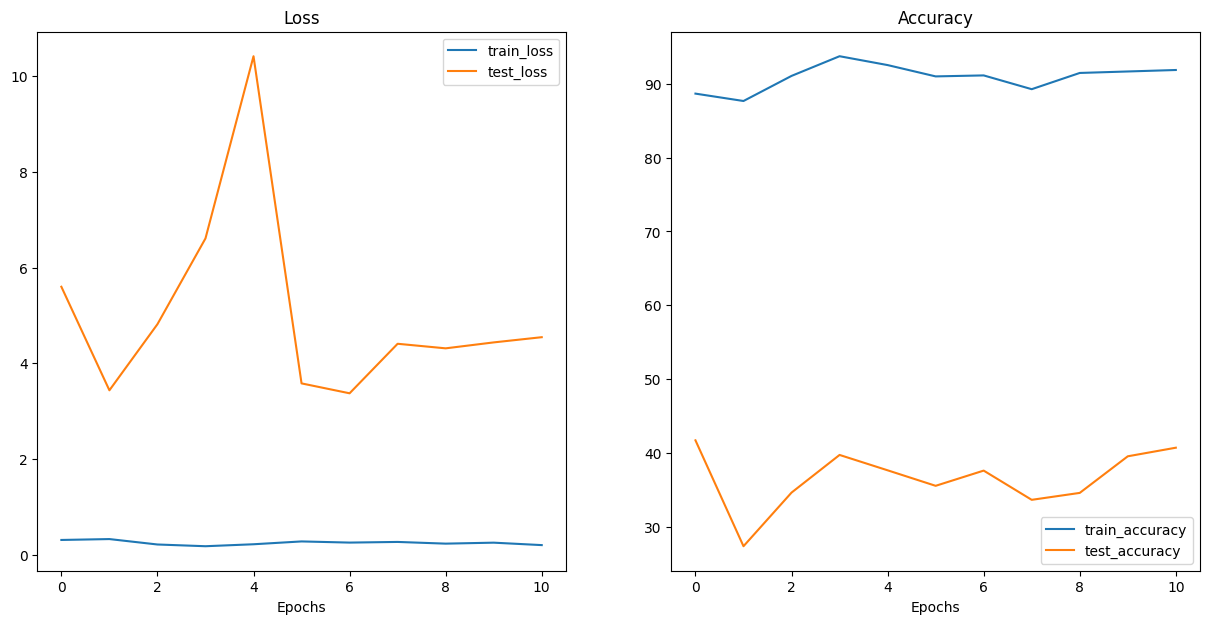

In [64]:
plot_loss_curves(model_0_results)